In [154]:
import numpy as np
import math
# the ipython magic below must be commented out in the .py file, since it doesn't work.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import subprocess
import numpy.ma as ma
import scipy.optimize as opt

In [155]:
# g1
ag1=0
bg1=18.3e5
cg1=-225e6
sg1=140
# g2
ag2=0
bg2=12.4e5
cg2=-378e6
dg2=4.24e10
sg2=76
# f
af=0
bf=2.e5
cf=-8.5e6
sf=45.

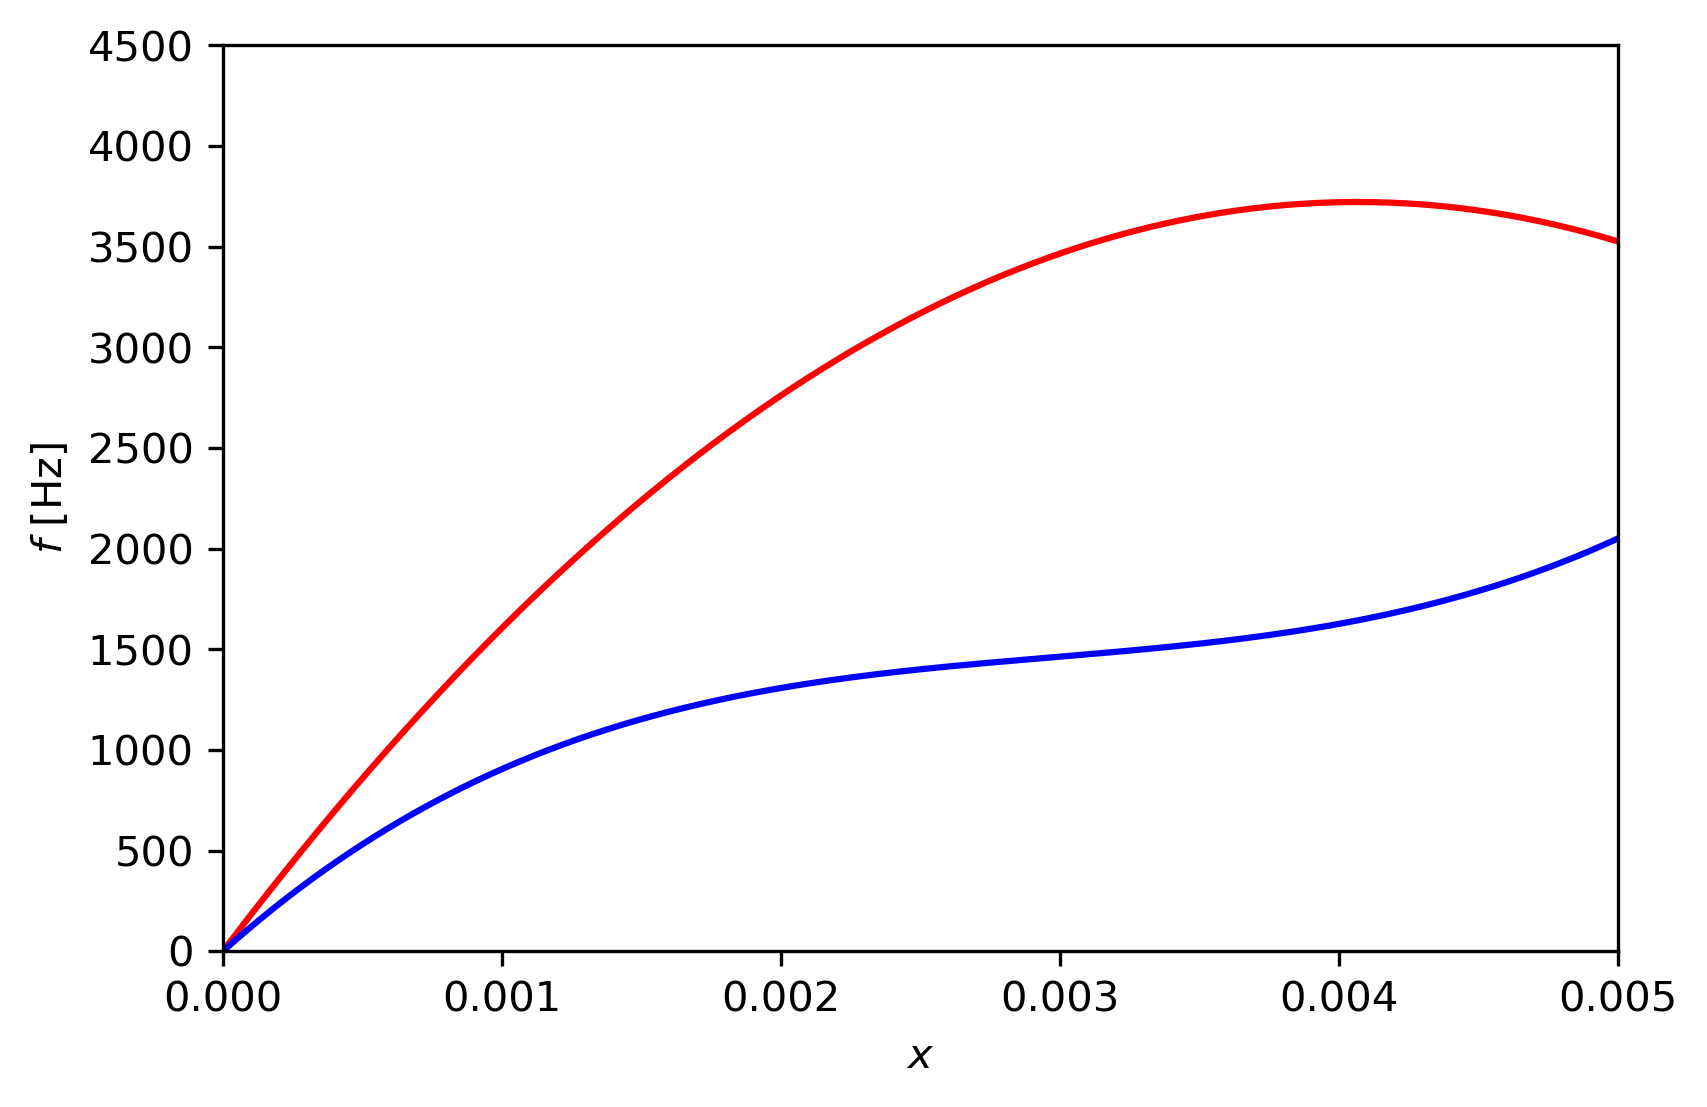

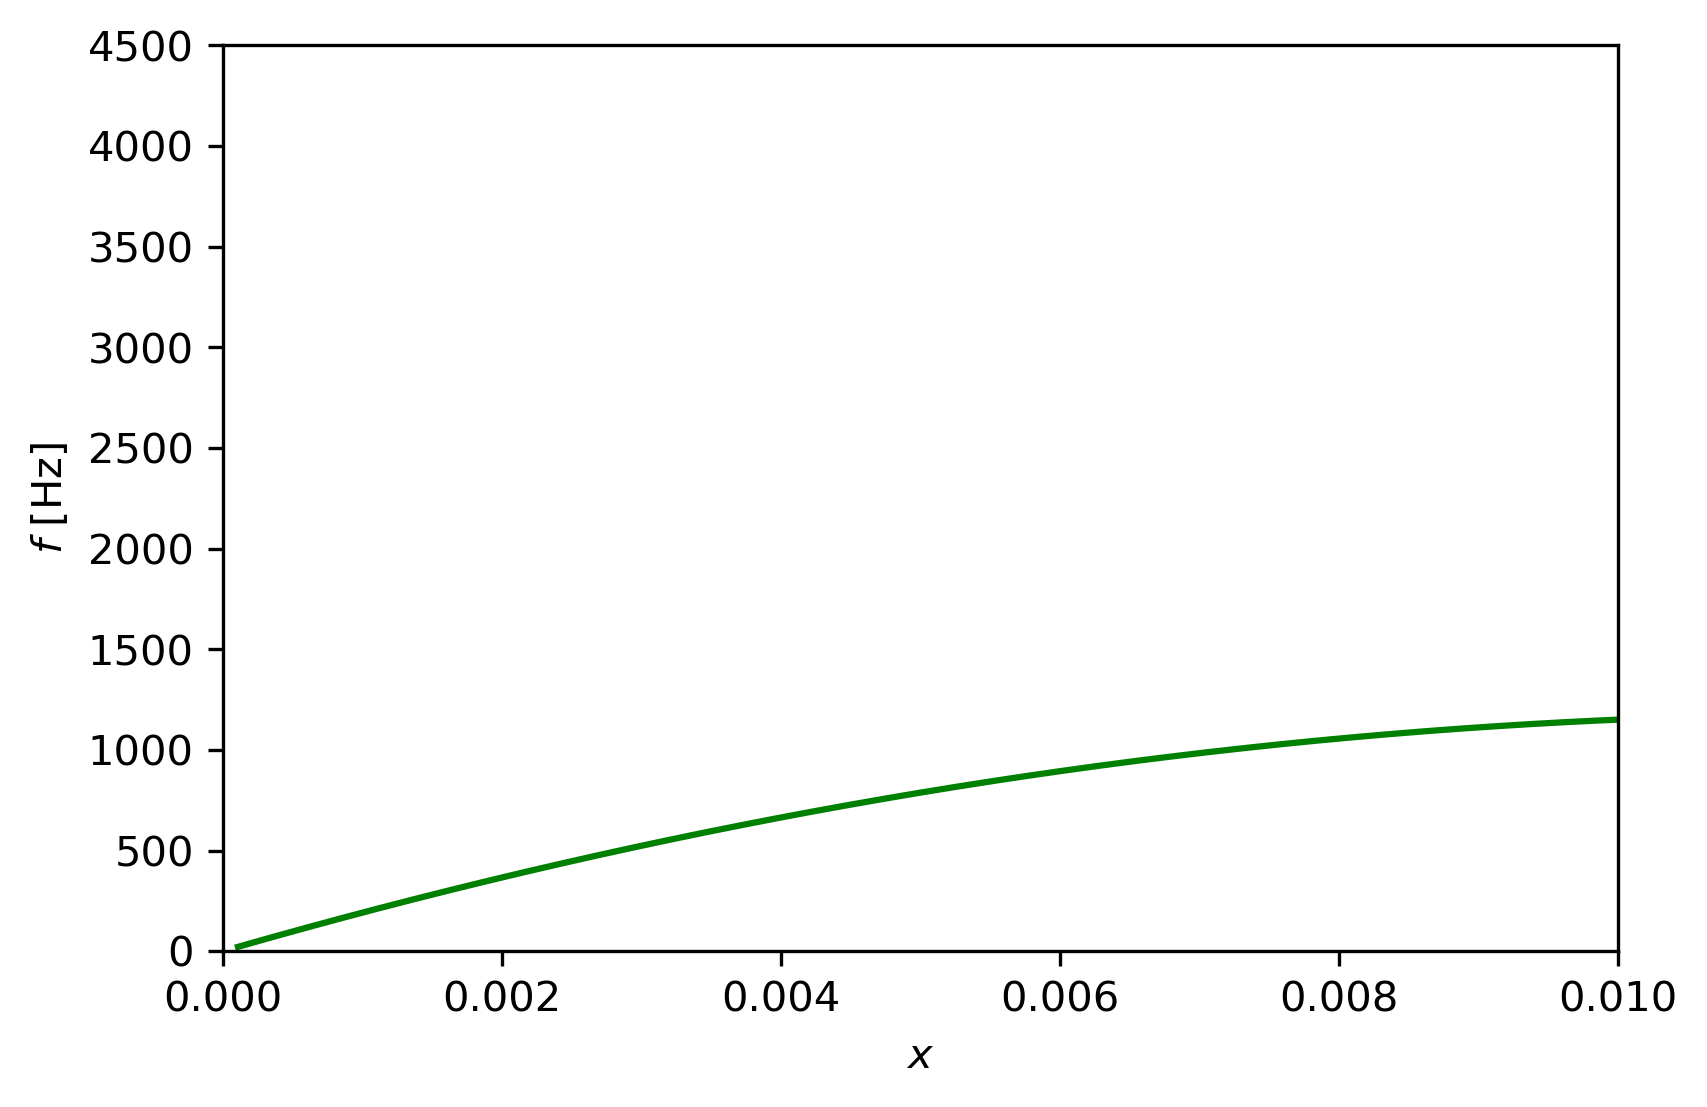

In [156]:
r=np.arange(1,600,0.1)
x1 = 1.2/r**2
x2 = 2.5/r**2

x1p = np.sqrt(1.2/r**3)
x2p = np.sqrt(2.5/r**3)

fg11 = ag1+bg1*x1+cg1*x1**2
fg12 = ag1+bg1*x2+cg1*x2**2

fg21 = ag2+bg2*x1+cg2*x1**2+dg2*x1**3
fg22 = ag2+bg2*x2+cg2*x2**2+dg2*x2**3

ff1 = af+bf*x1p+cf*x1p**2
ff2 = af+bf*x2p+cf*x2p**2

fg1min = np.minimum(fg11,fg12)- 2*sg1
fg1max = np.maximum(fg11,fg12)+ 2*sg1

fg2min = np.minimum(fg21,fg22)- 2*sg2
fg2max = np.maximum(fg21,fg22)+ 2*sg2

ffmin = np.minimum(ff1,ff2)- 2*sf
ffmax = np.maximum(ff1,ff2)+ 2*sf

#----------------------------------
plt.figure(figsize=(6,4),dpi=150)
plt.rc('text', usetex=False)
plt.xlabel(r'$x$')
plt.ylabel(r'$f$ [Hz]')

plt.plot(x2,fg12,"r")
plt.plot(x2,fg22,"b")
plt.axis([0,0.005 , 0., 4500.])
plt.show()

#----------------------------------
plt.figure(figsize=(6,4),dpi=150)
plt.rc('text', usetex=False)
plt.xlabel(r'$x$')
plt.ylabel(r'$f$ [Hz]')

plt.plot(x2p,ff2,"g")

plt.axis([0,0.01 , 0., 4500.])
plt.show()



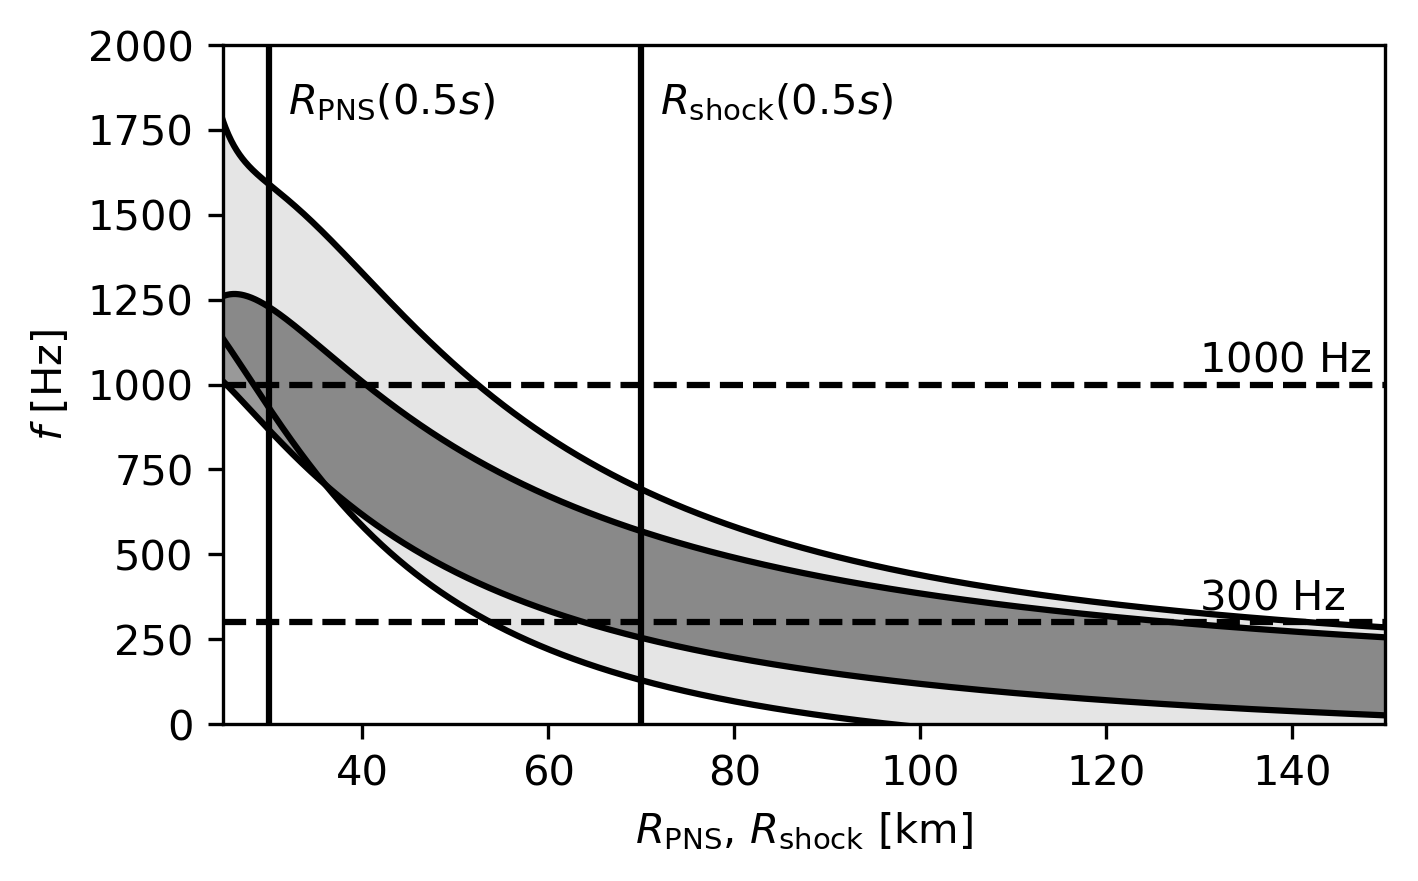

In [169]:
#----------------------------------
plt.figure(figsize=(5,3),dpi=150)
plt.rc('text', usetex=False)
plt.xlabel(r'$R_{\rm PNS}$, $R_{\rm shock}$ [km]')
plt.ylabel(r'$f$ [Hz]')
plt.axis([25.,150 , 0., 2000.])

plt.plot (r,ffmin,"black")
plt.plot (r,ffmax,"black")
plt.fill_between (r,ffmin,ffmax,facecolor="black",alpha=0.4)

plt.plot (r,fg2min,"black")
plt.plot (r,fg2max,"black")
plt.fill_between (r,fg2min,fg2max,facecolor="black",alpha=0.1)


plt.axvline(x=30.,linestyle="-",color="black")
#plt.axvline(x=28.3,linestyle="--",color="black")
#plt.axvline(x=52.4,linestyle="--",color="black")
plt.axhline(y=1000.,linestyle="--",color="black")
plt.text(130,1040,r'$1000$ Hz')


plt.axvline(x=70,linestyle="-",color="black")
#plt.axvline(x=63.8,linestyle="--",color="b")
#plt.axvline(x=127.2,linestyle="--",color="b")
plt.axhline(y=300.,linestyle="--",color="black")
plt.text(130,340,r'$300$ Hz',color="black")
plt.text(72,1800,r'$R_{\rm shock} ($0.5$ s)$',color="black")
plt.text(32,1800,r'$R_{\rm PNS} ($0.5$ s)$',color="black")


#plt.plot (r,ffmin,"r")
#plt.plot (r,ffmax,"r")
#plt.fill_between (r,ffmin,ffmax,facecolor="red",alpha=0.3)
plt.show()

In [158]:
idx=np.where(fg2max<1000.)
print idx

(array([ 514,  515,  516, ..., 5987, 5988, 5989]),)


In [159]:
idx=np.where(ffmax>300.)
print idx

(array([ 124,  125,  126, ..., 1260, 1261, 1262]),)


In [160]:
print r[273], r[514]
print r[628], r[1262]

28.3 52.4
63.8 127.2


In [94]:
print ffmin[628]

300.644947521
